# HYPOTHESIS TESTS

https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

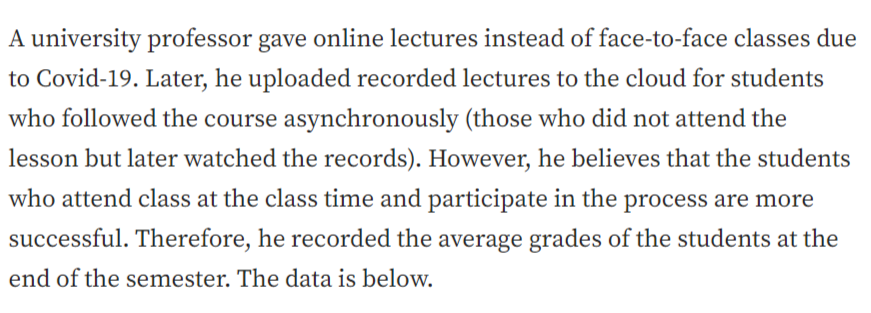

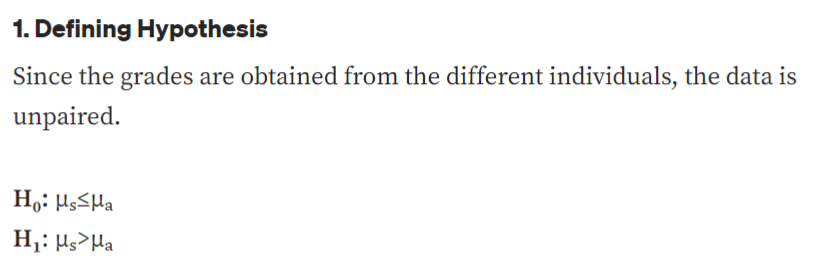

In [62]:
import scipy.stats as stats
import numpy as np

In [4]:
synchronous = [94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6]
asynchronous = [77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2]

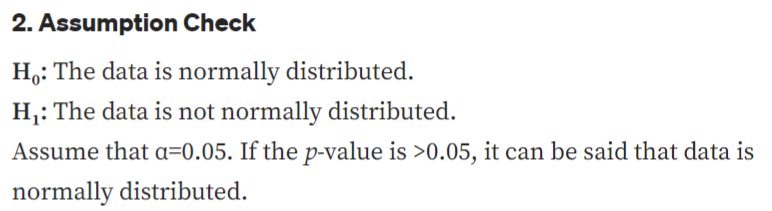

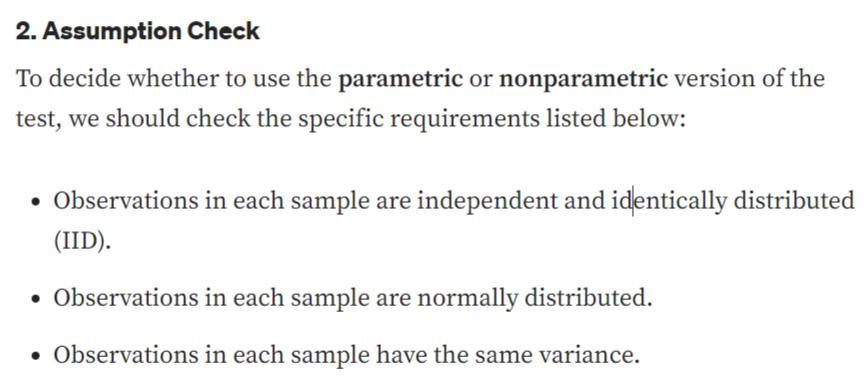

In [3]:
#checking normality for small (preferrably) samples

def check_normality(data):
    test_stat_normality, p_value_normality = stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)

    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")


In [20]:

sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2, 87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr = np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])

check_normality(sync)
check_normality(asyncr)


p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed


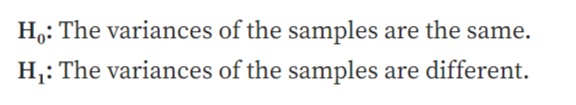

In [5]:

def check_variance_homogeneity(group1, group2):

    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")


In [6]:
check_variance_homogeneity(sync, asyncr)

p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.



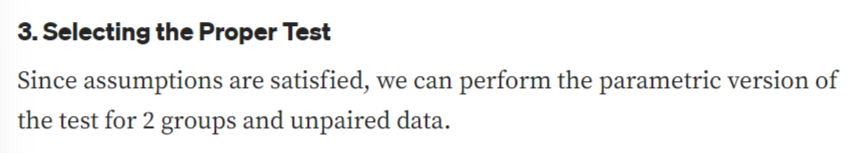

In [56]:

ttest,p_value = stats.ttest_ind(sync,asyncr)

print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))

if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


In [57]:
ttest #could not seem to get this output, see my independent notes below

2.8414882345796917

https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

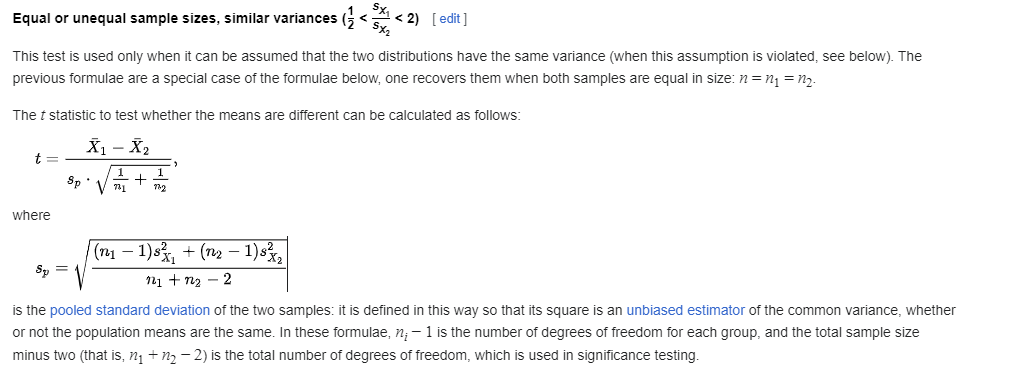

In [52]:
sp = ( ( (len(sync)-1)*np.var(sync) + (len(asyncr)-1)*np.var(asyncr) )/(len(sync)+len(asyncr)-2) )**0.5

my_t = ( np.mean(sync) - np.mean(asyncr) )/(  sp*(  1/len(sync) + 1/len(asyncr) )**0.5 )
my_t

2.924114513557154

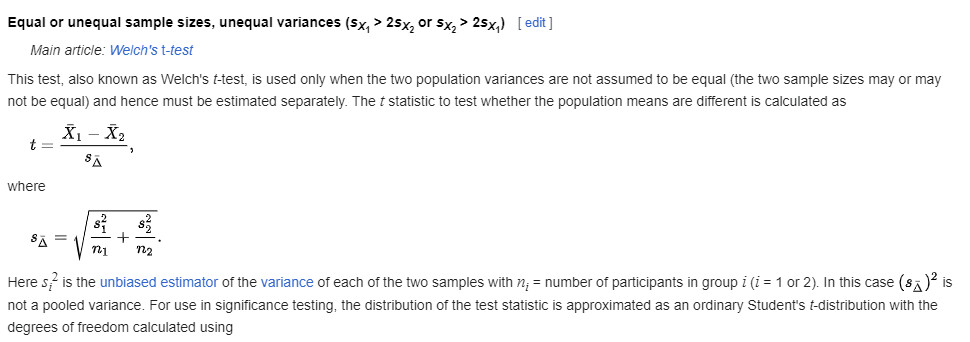

In [53]:
s_delta = ( np.var(sync)/len(sync) + np.var(asyncr)/len(asyncr) )**0.5

my_t = ( np.mean(sync) - np.mean(asyncr) )/s_delta
my_t

2.9154981807309754

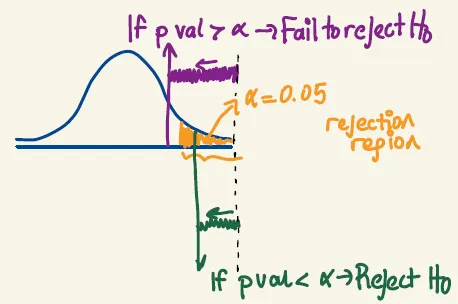

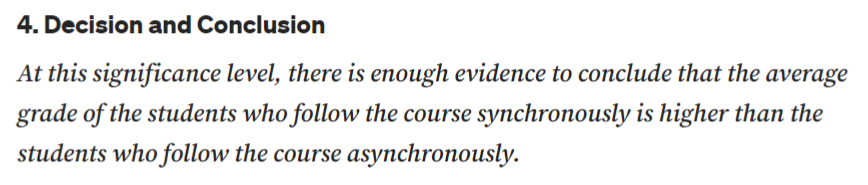

ANOVA

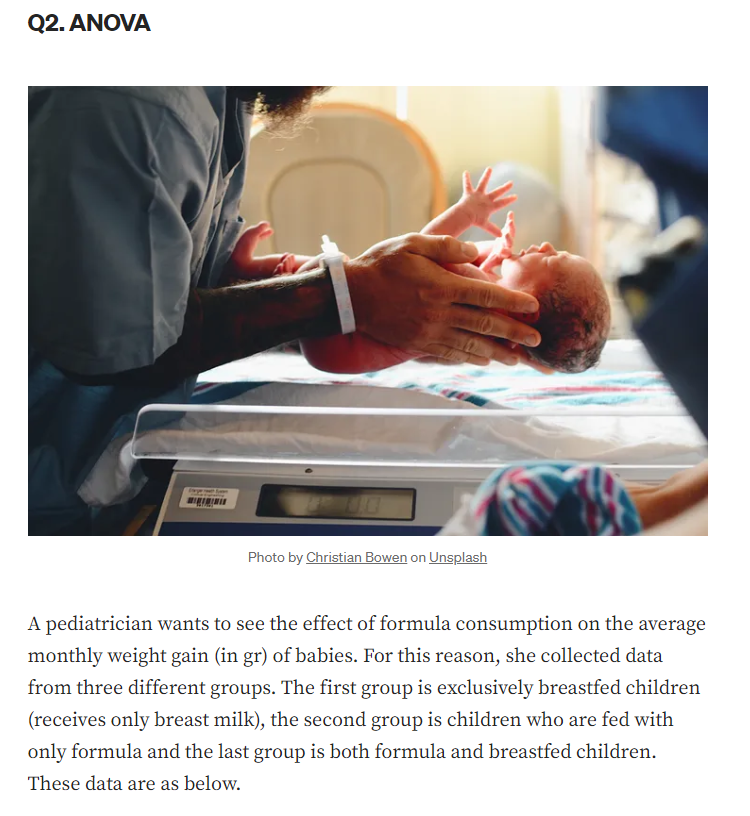

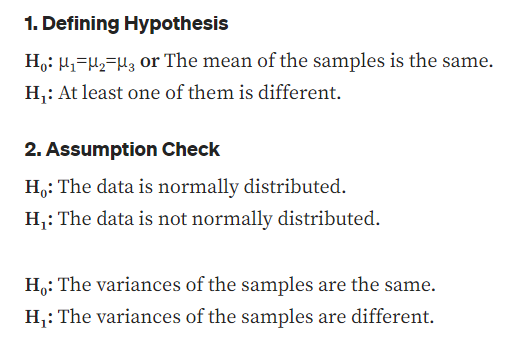

In [31]:
only_breast=[794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]

only_formula=[ 898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]

both=[976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

In [32]:
check_normality(only_breast)
check_normality(only_formula)
check_normality(both)

stat, pvalue_levene= stats.levene(only_breast,only_formula,both)
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")


p value:0.4694
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8879
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7973
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7673
Fail to reject null hypothesis >> The variances of the samples are same.


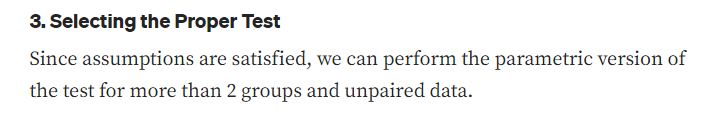

In [33]:
F, p_value = stats.f_oneway(only_breast,only_formula,both)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.000000
Reject null hypothesis


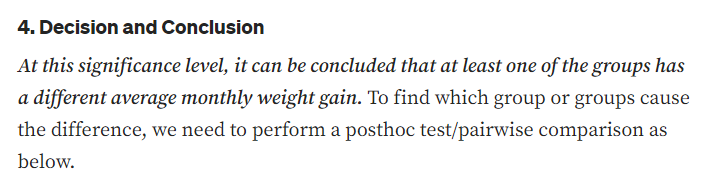

In [35]:

# pip install scikit-posthocs
# Pairwise T test for multiple comparisons of independent groups. May be used after a parametric ANOVA to do pairwise comparisons.

import scikit_posthocs as sp
posthoc_df= sp.posthoc_ttest([only_breast,only_formula,both], equal_var=True, p_adjust="bonferroni")

group_names= ["only breast", "only formula","both"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")


C:\Users\jpkdu\AppData\Local\Temp\ipykernel_24116\2811338419.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")


,only breast,only formula,both
only breast,1.000000,0.000000,0.129454
only formula,0.000000,1.000000,0.000004
both,0.129454,0.000004,1.000000


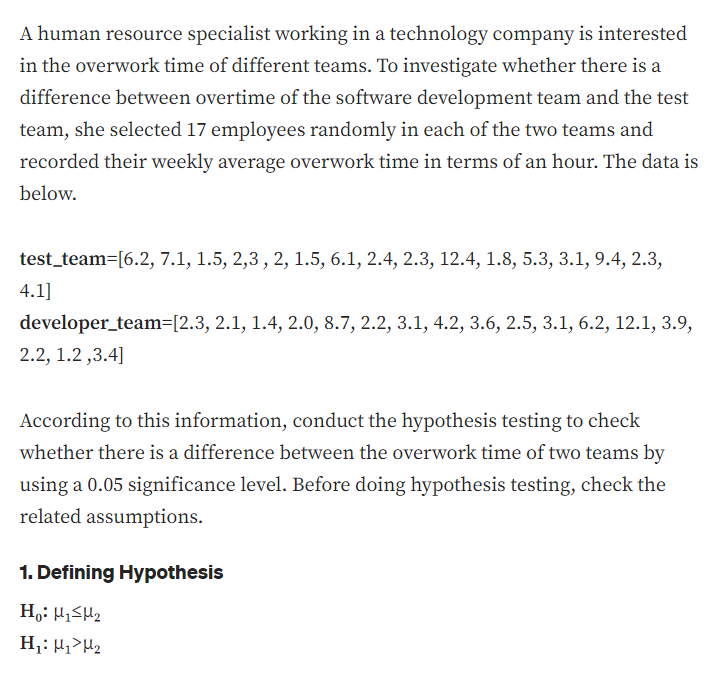

In [58]:
test_team=[6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team=[2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

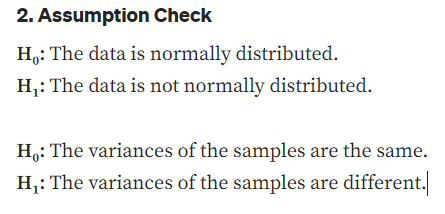

In [59]:
check_normality(test_team)
check_normality(developer_team)
check_variance_homogeneity(test_team, developer_team)

p value:0.0046
Reject null hypothesis >> The data is not normally distributed
p value:0.0005
Reject null hypothesis >> The data is not normally distributed
p value:0.5410
Fail to reject null hypothesis >> The variances of the samples are same.


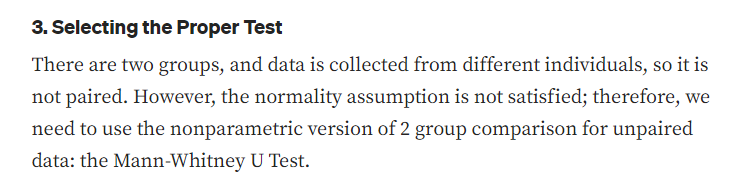

In [60]:
ttest,pvalue = stats.mannwhitneyu(test_team,developer_team, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value:0.8226
Fail to recejt null hypothesis


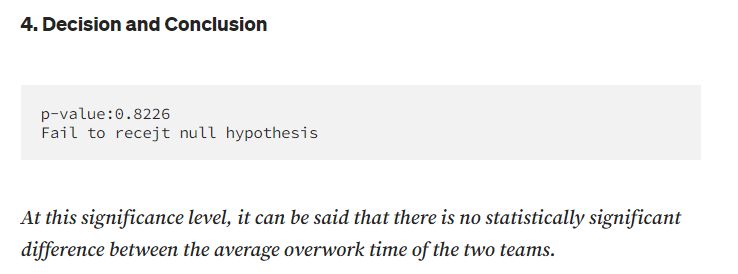

Applying t-test on the following MAT262 HW Problem:

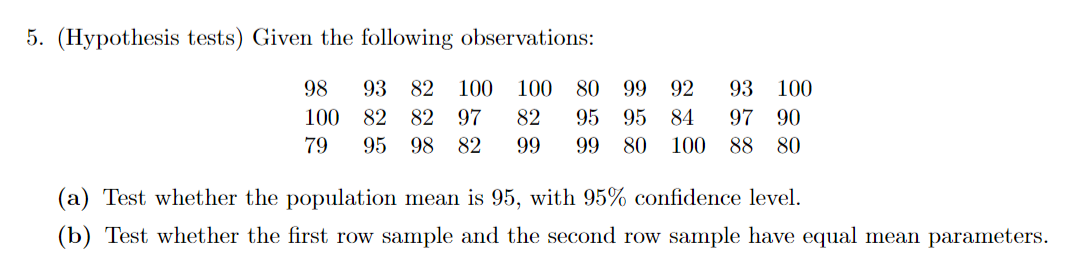

In [67]:
observations = np.array( [98, 93, 82, 100, 100, 80, 99, 92, 93, 100,
 100, 82, 82, 97, 82, 95, 95, 84, 97, 90,
 79, 95, 98, 82, 99, 99, 80, 100, 88, 80] )

observations


array([ 98,  93,  82, 100, 100,  80,  99,  92,  93, 100, 100,  82,  82,
        97,  82,  95,  95,  84,  97,  90,  79,  95,  98,  82,  99,  99,
        80, 100,  88,  80])

In [68]:
len(observations)

30

In [102]:
mu = 95
alpha = 0.05
kind = 'two' # 'one' 'two'

ttest,p_value = stats.ttest_1samp(a=observations, popmean=mu)

#outputs from the stat function
print(f"t-statistic: {ttest} - output ttest is negative (on the left tail) by default")
print(f"p-value: {p_value} - output p-value is for two-sided by default\n" )

if kind == 'two':
    print(f"since the hypothesis is two-sided >> 2*p_value_one-sided = p_value_two_sided = {p_value} ")
    print(f'alpha={alpha} is split such that each side has {alpha/2}\n')

    print(f'p-value = P(-|ttest| < t) + P(t > |ttest|) = {p_value} [< or >] {alpha} = P(-|tcrit| < t ) + P(t > |tcrit| ) = alpha/2 + alpha/2')
    print('alternatively,')
    print(f'p-value = P(-|ttest| < t) OR P(t > |ttest|) = {p_value/2} [< or >] {alpha/2} = P(-|tcrit| < t ) OR P(t > |tcrit| ) = alpha/2\n')


    if p_value < alpha:
        print(f"Reject null hypothesis since p-value = {p_value} < alpha = {alpha}")
    else:
        print(f"Fail to reject null hypothesis since p-value = {p_value} > alpha = {alpha}")

elif kind == 'one':
    print(f"since the hypothesis is one-sided >> p_value_one-sided = p_value_two_sided/2 = {p_value/2} ")
    print(f'alpha={alpha} is concentrated to the left\n')

    print(f'p-value = P(-|ttest| < t) = {p_value/2} [< or >] {alpha} = P(-|tcrit| < t ) = alpha')
    
    if p_value/2 < alpha:
        print(f"Reject null hypothesis since p-value = {p_value/2} < alpha = {alpha}")
    else:
        print(f"Fail to reject null hypothesis since p-value = {p_value/2} > alpha = {alpha}")

else:
    'incorrect kind input'




t-statistic: -2.53233477013605 - output ttest is negative (on the left tail) by default
p-value: 0.017002357248728735 - output p-value is for two-sided by default

since the hypothesis is two-sided >> 2*p_value_one-sided = p_value_two_sided = 0.017002357248728735 
alpha=0.05 is split such that each side has 0.025

p-value = P(-|ttest| < t) + P(t > |ttest|) = 0.017002357248728735 [< or >] 0.05 = P(-|tcrit| < t ) + P(t > |tcrit| ) = alpha/2 + alpha/2
alternatively,
p-value = P(-|ttest| < t) OR P(t > |ttest|) = 0.008501178624364367 [< or >] 0.025 = P(-|tcrit| < t ) OR P(t > |tcrit| ) = alpha/2

Reject null hypothesis since p-value = 0.017002357248728735 < alpha = 0.05


In [76]:
my_t = (np.mean(observations) - mu)/( np.std(observations)/len(observations)**0.5 )
my_t #manual calculation ttest is slightly different from the above output

-2.5756256798688746

my p-value = P(-my_t < t) + P(t > my_t) = 0.016 (for two-tails test)

http://www.statdistributions.com/t?t=-2.57&df=29

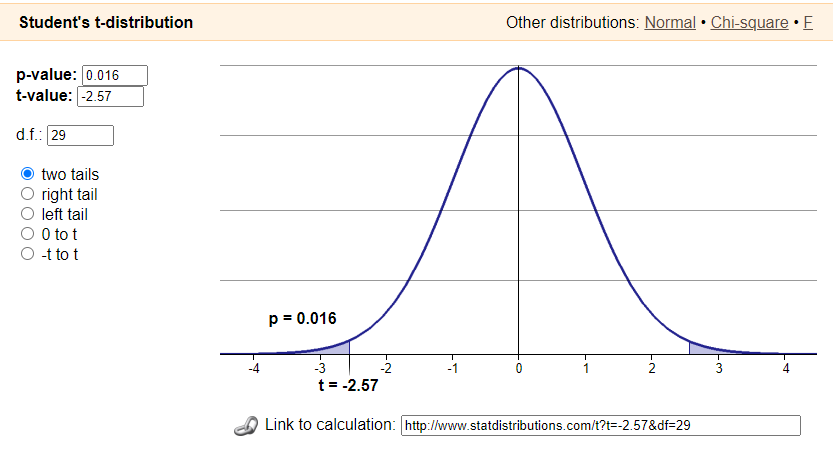